# Gerekli Kütüphanelerin Yüklenmesi Ve Datasetinin İndirilmesi

In [ ]:
import pandas as pd
import numpy as np
import os
from huggingface_hub import login
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


from datasets import load_dataset



login(os.getenv("HF_TOKEN"))

ds = load_dataset("umutertugrul/turkish-academic-theses-dataset", split="train")
df = ds.to_pandas()
df.head()
df.tail()

Generating train split:   0%|          | 0/648974 [00:00<?, ? examples/s]

,tez_no,pdf_url,title_tr,title_en,author,advisor,location,subject,index,status,degree,language,year,pages,abstract_tr,abstract_en
648969,938000,https://tez.yok.gov.tr/UlusalTezMerkezi/TezGos...,Öğrenme güçlüğü olan çocuklarda akademik başar...,The academic achievement of children with lear...,EMİNE KUŞCU BAYKARA,DR. ÖĞR. ÜYESİ AYŞE BENGİSOY,European University of Lefke / Yurtdışı Enstit...,Eğitim ve Öğretim = Education and Training,Özgül öğrenme güçlüğü = Specific learning disa...,Onaylandı,Yüksek Lisans,Türkçe,2024,114,"Bu araştırmanın amacı, öğrenme güçlüğü olan ço...",The aim of this study is to synthesize the res...
648970,937760,https://tez.yok.gov.tr/UlusalTezMerkezi/TezGos...,Özel gereksinimli çocuk annelerinde psikolojik...,Investigation of the relationships between psy...,SİMGE KURT,DOÇ. DR. SULTAN ŞEHİTOĞLU ; DOÇ. DR. ALİYE EZG...,European University of Lefke / Lisansüstü Eğit...,Psikoloji = Psychology,None,Onaylandı,Yüksek Lisans,Türkçe,2024,67,Bu çalışmada özel gereksinimli çocuk annelerin...,This study aimed to examine the relationships ...
648971,940085,https://tez.yok.gov.tr/UlusalTezMerkezi/TezGos...,İşitme yetersizliği olan öğrencilere okuma yaz...,None,ÖMER FARUK SOLMAZ,PROF. DR. HASAN AVCIOĞLU,Uluslararası Kıbrıs Üniversitesi / Lisansüstü ...,Eğitim ve Öğretim = Education and Training,None,Onaylandı,Yüksek Lisans,Türkçe,2024,145,"Bu araştırmada, ses temelli cümle yöntemi izle...",This study aims to investigate the effectivene...
648972,912502,https://tez.yok.gov.tr/UlusalTezMerkezi/TezGos...,Teneffüslerde sosyalleşme sorunu yaşayan öğren...,People who have socialization problems during ...,ONUR TAZEGÜL,DOÇ. DR. ÖZCAN PALAVAN,European University of Lefke / Yurtdışı Enstit...,Eğitim ve Öğretim = Education and Training,None,Onaylandı,Yüksek Lisans,Türkçe,2024,92,"Teneffüsler, öğrencilerin sadece fizyolojik ih...",School breaks are not only for students to mee...
648973,937875,https://tez.yok.gov.tr/UlusalTezMerkezi/TezGos...,Mezuniyeti pandemi döneminde olan özel eğitim ...,Examining teacher opinions regarding the diffi...,METİN AKSU,PROF. DR. AYŞEGÜL ATAMAN ; YRD. DOÇ. DR. HATİC...,European University of Lefke / Lisansüstü Eğit...,Eğitim ve Öğretim = Education and Training,None,Onaylandı,Yüksek Lisans,Türkçe,2024,102,2019 yılında ilk kez Çin'in Wuhan kentinde ort...,"The Covid-19 outbreak, which first emerged in ..."


# Veri Ön İşleme

In [ ]:
df.dtypes

,0
year,int64
title_tr,object
abstract_tr,object


In [ ]:
df = df[['year', 'title_tr', 'abstract_tr']].copy()
print(f"Toplam {len(df)} kayıt yüklendi.")

Toplam 648974 kayıt yüklendi.


In [ ]:
df['year_numeric'] = pd.to_numeric(df['year'], errors='coerce')
missing_data = pd.Series({
    'title_tr': df['title_tr'].isnull().sum(),
    'abstract_tr': df['abstract_tr'].isnull().sum(),
    'year (HATA OLABİLECEK)': df['year_numeric'].isnull().sum()
})
print(missing_data.to_string())
total_missing = missing_data.sum()
print(f"TOPLAMDA TEMİZLENMESİ GEREKEN EKSİK/HATALI KAYIT SAYISI: {total_missing}")

title_tr                  0
abstract_tr               0
year (HATA OLABİLECEK)    0
TOPLAMDA TEMİZLENMESİ GEREKEN EKSİK/HATALI KAYIT SAYISI: 0


In [ ]:
# Tip Dönüşümü
df['year_numeric'] = pd.to_numeric(df['year'], errors='coerce')

# 2001–2025 arası filtre
df_clean = df[(df['year_numeric'] >= 2001) & (df['year_numeric'] <= 2025)]


def secure_sample(g):
    return g.sample(n=500, replace=(len(g) < 500), random_state=42)


sampled_df = (
    df_clean
    .groupby('year_numeric', group_keys=False)
    .apply(secure_sample)
)

print(sampled_df['year_numeric'].value_counts().sort_index())
print("Toplam seçilen tez sayısı:", len(sampled_df))


year_numeric
2001    500
2002    500
2003    500
2004    500
2005    500
2006    500
2007    500
2008    500
2009    500
2010    500
2011    500
2012    500
2013    500
2014    500
2015    500
2016    500
2017    500
2018    500
2019    500
2020    500
2021    500
2022    500
2023    500
2024    500
Name: count, dtype: int64
Toplam seçilen tez sayısı: 12000


/tmp/ipython-input-1727759275.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(secure_sample)


In [ ]:
sampled_df.head()

# Eksik Değer Analizi

In [ ]:
sampled_df.isnull().sum()

In [ ]:
sampled_df.subject.value_counts()

In [ ]:
print("Yılların min–max aralığı:", df['year_numeric'].min(), "→", df['year_numeric'].max())
print("Kaç tez hangi yılda var?")
print(df['year_numeric'].value_counts().sort_index())


Yılların min–max aralığı: 1963 → 2024
Kaç tez hangi yılda var?
year_numeric
1963        1
1964        3
1965        3
1966        4
1967        3
        ...  
2020    34713
2021    42896
2022    53065
2023    54690
2024    57370
Name: count, Length: 62, dtype: int64


In [ ]:
df_clean.drop(["subject","year"], axis=1, inplace=True)

In [ ]:
df_clean.head()

# Spearman Korelasyon Analizi

In [ ]:
df_clean["title_len"]    = df_clean["title_tr"].str.split().apply(len)
df_clean["abstract_len"] = df_clean["abstract_tr"].str.split().apply(len)

In [ ]:
df_clean[["year_numeric","title_len","abstract_len"]].corr(method="spearman")

	year_numeric	title_len	abstract_len
year_numeric	1.000000	0.098038	0.15737

title_len	0.098038	1.000000	0.22385

abstract_len	0.157370	0.223850	1.00000


# İstatistiksel Anlamlılık Testi (ANOVA)

In [ ]:
df_clean["year_group"] = pd.cut(df_clean["year_numeric"],
                                bins=[2000,2010,2020,2030],
                                labels=["2000–2010","2010–2020","2020–2030"])

In [ ]:
# ANOVA testi → ortalama uzunluklar yıllara göre farklı mı?

from scipy.stats import f_oneway

f_title = f_oneway(
    *[df_clean.loc[df_clean["year_group"]==grp,"title_len"] for grp in df_clean["year_group"].unique()]
)
f_abs = f_oneway(
    *[df_clean.loc[df_clean["year_group"]==grp,"abstract_len"] for grp in df_clean["year_group"].unique()]
)

print("\nANOVA Title:", f_title)
print("ANOVA Abstract:", f_abs)

ANOVA Title: F_onewayResult(statistic=np.float64(2628.6061693293664), pvalue=np.float64(0.0))

ANOVA Abstract: F_onewayResult(statistic=np.float64(4850.332370292906), pvalue=np.float64(0.0))

H0: “Yıllara göre ortalama metin uzunlukları arasında fark yoktur”. Elde edilen sonuçlarda hem title_len hem de abstract_len için p-value ≈ 0 bulunmuştur (p < 0.05). H0 red. Metin uzunluklarının yıllar arasında anlamlı farklılık gösterdiği sonucuna ulaşılmıştır.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.boxplot(data=df_clean, x="year_group", y="title_len")
plt.title("Başlık Uzunluğu Yıllara Göre")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_clean, x="year_group", y="abstract_len")
plt.title("Özet Uzunluğu Yıllara Göre")
plt.show()

In [ ]:
#Eğitim ve Test veri setii bölme işlemi
def split_train_test(g):

    g = g.sample(frac=1, random_state=42).reset_index(drop=True)

    train = g.iloc[:250].copy()   # İlk 250 → train
    test  = g.iloc[250:500].copy()  # Sonraki 250 → test

    train["split"] = "train"
    test["split"] = "test"

    return pd.concat([train, test], axis=0)


final_df = (
    sampled_df
    .groupby("year_numeric", group_keys=False)
    .apply(split_train_test)
)

# Kontrol
print(final_df["split"].value_counts())
print(final_df.groupby(["year_numeric", "split"]).size())
print("Toplam final veri:", len(final_df))


split
train    6000
test     6000
Name: count, dtype: int64
year_numeric  split
2001          test     250
              train    250
2002          test     250
              train    250
2003          test     250
              train    250
2004          test     250
              train    250
2005          test     250
              train    250
2006          test     250
              train    250
2007          test     250
              train    250
2008          test     250
              train    250
2009          test     250
              train    250
2010          test     250
              train    250
2011          test     250
              train    250
2012          test     250
              train    250
2013          test     250
              train    250
2014          test     250
              train    250
2015          test     250
              train    250
2016          test     250
              train    250
2017          test     250
              train    250
20

/tmp/ipython-input-3001063431.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(split_train_test)


# Vektör Temsilleri (Embedding)

In [ ]:

from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("ytu-ce-cosmos/turkish-e5-large")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [ ]:
def get_embeddings_in_batches(texts, model, batch_size=32):
    all_embs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        emb = model.encode(batch, convert_to_numpy=True, show_progress_bar=False)
        all_embs.append(emb)
    return np.vstack(all_embs)

In [ ]:
titles = final_df["title_tr"].tolist()
abstracts = final_df["abstract_tr"].tolist()

In [ ]:
title_embeddings = get_embeddings_in_batches(titles, model, batch_size=32)
abstract_embeddings = get_embeddings_in_batches(abstracts, model, batch_size=32)

print(title_embeddings.shape)
print(abstract_embeddings.shape)


(12000, 1024)
(12000, 1024)


In [ ]:
import numpy as np

# 1) Başlık embeddingleri
X_title = title_embeddings

# 2) Özet embeddingleri
X_abstract = abstract_embeddings

# 3) Başlık + özet vektörel olarak yan yana birleştirme (concatenate)
X_tab = np.concatenate(
    [title_embeddings, abstract_embeddings],
    axis=1
)

print("X_title şekli:", X_title.shape)
print("X_abstract şekli:", X_abstract.shape)
print("X_tab şekli:", X_tab.shape)


X_title şekli: (12000, 1024)
X_abstract şekli: (12000, 1024)
X_tab şekli: (12000, 2048)


In [ ]:
train_mask = final_df["split"] == "train"
test_mask  = final_df["split"] == "test"

X_title_train = X_title[train_mask]
X_title_test  = X_title[test_mask]

X_abstract_train = X_abstract[train_mask]
X_abstract_test  = X_abstract[test_mask]

X_tab_train = X_tab[train_mask]
X_tab_test  = X_tab[test_mask]

y_year = final_df["year"].values
y_year_train = y_year[train_mask]
y_year_test  = y_year[test_mask]

# **BAGGING**

In [ ]:

# =====================================================
# OPTİMİZE BAGGING — Title / Abstract / TaB
# =====================================================

# 1) Ortak base tree
bag_base = DecisionTreeClassifier(
    min_samples_leaf=5,
    random_state=42
)

# 2) Hızlı ve makul hiperparametre aralığı
bag_param_distributions = {
    "n_estimators": randint(50, 121),
    "estimator__max_depth": [10, 20]
}

# 3) Temsiller sözlüğü
rep_datasets = {
    "Title":   (X_title_train,   X_title_test),
    "Abstract": (X_abstract_train, X_abstract_test),
    "TaB":    (X_tab_train,     X_tab_test)
}

results_bag = []

for rep_name, (X_tr, X_te) in rep_datasets.items():
    print(f"\n================= {rep_name} için Bagging RandomizedSearch (HIZLI) =================")


    X_tr_sub, _, y_tr_sub, _ = train_test_split(
        X_tr,
        y_year_train,
        test_size=0.6,          # train'in %40'ı ile arama
        stratify=y_year_train,
        random_state=42
    )


    bag_model = BaggingClassifier(
        estimator=bag_base,
        max_samples=0.7,        # her ağaç için veri alt kümesi
        max_features=0.7,       # her ağaç için feature alt kümesi
        n_jobs=2,               # -1 yerine 2 -> RAM & stabilite
        random_state=42
    )

    bag_search = RandomizedSearchCV(
        estimator=bag_model,
        param_distributions=bag_param_distributions,
        n_iter=8,               # 8 deneme
        scoring="accuracy",
        cv=2,                   # 2-fold CV
        random_state=42,
        n_jobs=2,
        verbose=1
    )

    # Hiperparametre araması (alt küme üzerinde)
    bag_search.fit(X_tr_sub, y_tr_sub)

    print(f"\n[{rep_name}-Bagging] En iyi CV accuracy (sub-train): {bag_search.best_score_:.4f}")
    print(f"[{rep_name}-Bagging] En iyi parametreler: {bag_search.best_params_}")

    # En iyi modeli tüm train üzerinde yeniden eğit
    best_bag = bag_search.best_estimator_
    best_bag.fit(X_tr, y_year_train)

    # Test performansı
    y_pred = best_bag.predict(X_te)

    acc  = accuracy_score(y_year_test, y_pred)
    mae  = mean_absolute_error(y_year_test, y_pred)
    mse  = mean_squared_error(y_year_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n[{rep_name} - Bagging TEST SONUÇLARI]")
    print(f"Accuracy : {acc:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"RMSE     : {rmse:.4f}")

    results_bag.append({
        "Temsil":  rep_name,
        "Model":   "Bagging",
        "Accuracy": acc,
        "MAE":      mae,
        "RMSE":     rmse,
        "Best_Params": bag_search.best_params_
    })


results_bag_df = pd.DataFrame(results_bag)
print("\n=== Bagging Özet Sonuçlar ===")
print(results_bag_df[["Temsil", "Model", "Accuracy", "MAE", "RMSE"]])



================= Title için Bagging RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[Title-Bagging] En iyi CV accuracy (sub-train): 0.0517
[Title-Bagging] En iyi parametreler: {'estimator__max_depth': 20, 'n_estimators': 51}

[Title - Bagging TEST SONUÇLARI]
Accuracy : 0.0502
MAE      : 7.3182
RMSE     : 9.1810

================= Abstract için Bagging RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[Abstract-Bagging] En iyi CV accuracy (sub-train): 0.0646
[Abstract-Bagging] En iyi parametreler: {'estimator__max_depth': 10, 'n_estimators': 73}

[Abstract - Bagging TEST SONUÇLARI]
Accuracy : 0.0702
MAE      : 6.1415
RMSE     : 8.0365

================= TaB için Bagging RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[TaB-Bagging] En iyi CV accuracy (sub-train): 0.0663
[TaB-Bagging] En iyi parametreler: {'estimator__max_d

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# =====================================================
# OPTİMİZE RANDOM FOREST — Title / Abstract / TaB
# =====================================================


rf_base = RandomForestClassifier(
    max_samples=0.7,        # Her ağaç için veri alt kümesi
    max_features=0.7,       # Her ağaç için feature alt kümesi
    oob_score=False,
    n_jobs=2,
    random_state=42,

)


rf_param_distributions = {
    "n_estimators": randint(50, 121),      # 50–120 arası
    "max_depth": [10, 20],                 # Max derinlik
    "min_samples_leaf": [5, 10]            # Yaprakta olması gereken minimum örnek sayısı
}



results_rf = []

for rep_name, (X_tr, X_te) in rep_datasets.items():
    print(f"\n================= {rep_name} için Random Forest RandomizedSearch (HIZLI) =================")


    X_tr_sub, _, y_tr_sub, _ = train_test_split(
        X_tr,
        y_year_train,
        test_size=0.6,          # train'in %40'ı ile arama
        stratify=y_year_train,
        random_state=42
    )



    rf_search = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=rf_param_distributions,
        n_iter=8,               # 8 deneme
        scoring="accuracy",
        cv=2,                   # 2-fold CV
        random_state=42,
        n_jobs=2,
        verbose=1
    )

    # Hiperparametre araması (alt küme üzerinde)
    rf_search.fit(X_tr_sub, y_tr_sub)

    print(f"\n[{rep_name}-RandomForest] En iyi CV accuracy (sub-train): {rf_search.best_score_:.4f}")
    print(f"[{rep_name}-RandomForest] En iyi parametreler: {rf_search.best_params_}")

    # En iyi modeli tüm train üzerinde yeniden eğit
    best_rf = rf_search.best_estimator_
    best_rf.fit(X_tr, y_year_train)

    # Test performansı
    y_pred = best_rf.predict(X_te)

    acc  = accuracy_score(y_year_test, y_pred)
    mae  = mean_absolute_error(y_year_test, y_pred)
    mse  = mean_squared_error(y_year_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n[{rep_name} - Random Forest TEST SONUÇLARI]")
    print(f"Accuracy : {acc:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"RMSE     : {rmse:.4f}")

    results_rf.append({
        "Temsil":  rep_name,
        "Model":   "RandomForest",
        "Accuracy": acc,
        "MAE":      mae,
        "RMSE":     rmse,
        "Best_Params": rf_search.best_params_
    })

results_rf_df = pd.DataFrame(results_rf)
print("\n=== Random Forest Özet Sonuçlar ===")
print(results_rf_df[["Temsil", "Model", "Accuracy", "MAE", "RMSE"]])




================= Title için Random Forest RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[Title-RandomForest] En iyi CV accuracy (sub-train): 0.0496
[Title-RandomForest] En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 73}

[Title - Random Forest TEST SONUÇLARI]
Accuracy : 0.0508
MAE      : 7.4655
RMSE     : 9.3391

================= Abstract için Random Forest RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[Abstract-RandomForest] En iyi CV accuracy (sub-train): 0.0688
[Abstract-RandomForest] En iyi parametreler: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 113}

[Abstract - Random Forest TEST SONUÇLARI]
Accuracy : 0.0838
MAE      : 5.8805
RMSE     : 7.8057

================= TaB için Random Forest RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[TaB-RandomForest] En iyi CV a

# **RANDOM SUBSPACE**

In [ ]:
# =====================================================
# OPTİMİZE RANDOM SUBSPACE — Title / Abstract / TaB
# =====================================================

rs_base = DecisionTreeClassifier(
    max_depth=20,
    min_samples_leaf=5,
    random_state=42
)

rs_param_distributions = {
    "n_estimators": randint(50, 121),
    "max_features": [0.3, 0.5, 0.8]
}


rep_datasets = {
    "Title":   (X_title_train,   X_title_test),
    "Abstract": (X_abstract_train, X_abstract_test),
    "TaB":    (X_tab_train,     X_tab_test)
}

results_rs = []

for rep_name, (X_tr, X_te) in rep_datasets.items():
    print(f"\n================= {rep_name} için Random Subspace RandomizedSearch (HIZLI) =================")

   # Train'den alt küme al
    X_tr_sub, _, y_tr_sub, _ = train_test_split(
        X_tr,
        y_year_train,
        test_size=0.6,          # train'in %40'ı ile arama
        stratify=y_year_train,
        random_state=42
    )


    rs_model = BaggingClassifier(
        estimator=rs_base,
        max_samples=1.0,
        n_jobs=2,
        random_state=42
    )

    rs_search = RandomizedSearchCV(
        estimator=rs_model,
        param_distributions=rs_param_distributions,
        n_iter=8,
        scoring="accuracy",
        cv=2,
        random_state=42,
        n_jobs=2,
        verbose=1
    )

    # Hiperparametre araması (alt küme üzerinde)
    rs_search.fit(X_tr_sub, y_tr_sub)

    print(f"\n[{rep_name}-RS] En iyi CV accuracy (sub-train): {rs_search.best_score_:.4f}")
    print(f"[{rep_name}-RS] En iyi parametreler: {rs_search.best_params_}")

    #  En iyi modeli tüm train üzerinde yeniden eğitme
    best_rs = rs_search.best_estimator_
    best_rs.fit(X_tr, y_year_train)

    # Test performansı
    y_pred = best_rs.predict(X_te)

    acc  = accuracy_score(y_year_test, y_pred)
    mae  = mean_absolute_error(y_year_test, y_pred)
    mse  = mean_squared_error(y_year_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n[{rep_name} - Random Subspace TEST SONUÇLARI]")
    print(f"Accuracy : {acc:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"RMSE     : {rmse:.4f}")

    results_rs.append({
        "Temsil":      rep_name,
        "Model":       "Random Subspace",
        "Accuracy":    acc,
        "MAE":         mae,
        "RMSE":        rmse,
        "Best_Params": rs_search.best_params_
    })


results_rs_df = pd.DataFrame(results_rs)
print("\n=== Random Subspace Özet Sonuçlar ===")
print(results_rs_df[["Temsil", "Model", "Accuracy", "MAE", "RMSE"]])



================= Title için Random Subspace RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[Title-RS] En iyi CV accuracy (sub-train): 0.0521
[Title-RS] En iyi parametreler: {'max_features': 0.8, 'n_estimators': 101}

[Title - Random Subspace TEST SONUÇLARI]
Accuracy : 0.0558
MAE      : 7.1812
RMSE     : 9.0550

================= Abstract için Random Subspace RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[Abstract-RS] En iyi CV accuracy (sub-train): 0.0708
[Abstract-RS] En iyi parametreler: {'max_features': 0.8, 'n_estimators': 71}

[Abstract - Random Subspace TEST SONUÇLARI]
Accuracy : 0.0797
MAE      : 6.0072
RMSE     : 7.9138

================= TaB için Random Subspace RandomizedSearch (HIZLI) =================
Fitting 2 folds for each of 8 candidates, totalling 16 fits

[TaB-RS] En iyi CV accuracy (sub-train): 0.0621
[TaB-RS] En iyi parametreler: {'max_features': 0.5,


=== TOPLU PERFORMANS TABLOSU ===
     Temsil            Model  Accuracy       MAE      RMSE  \
0     Title     RandomForest  0.050833  7.465500  9.339102   
1  Abstract     RandomForest  0.083833  5.880500  7.805714   
2       TaB     RandomForest  0.078667  6.322333  8.305159   
3     Title          Bagging  0.050167  7.318167  9.181022   
4  Abstract          Bagging  0.070167  6.141500  8.036490   
5       TaB          Bagging  0.076333  6.110000  7.995999   
6     Title  Random Subspace  0.055833  7.181167  9.055045   
7  Abstract  Random Subspace  0.079667  6.007167  7.913775   
8       TaB  Random Subspace  0.068167  6.078333  7.917828   

                                         Best_Params  
0  {'max_depth': 10, 'min_samples_leaf': 5, 'n_es...  
1  {'max_depth': 20, 'min_samples_leaf': 10, 'n_e...  
2  {'max_depth': 10, 'min_samples_leaf': 10, 'n_e...  
3   {'estimator__max_depth': 20, 'n_estimators': 51}  
4   {'estimator__max_depth': 10, 'n_estimators': 73}  
5   {'estimator

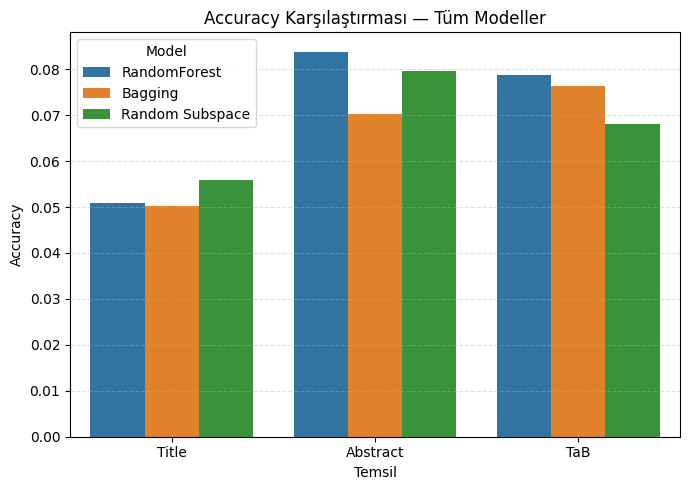

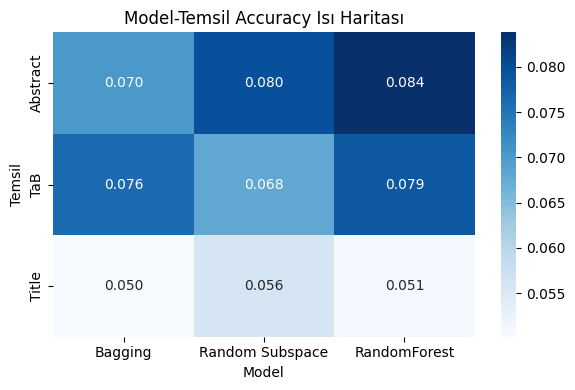

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

############################################################
# 1) — MODEL SONUÇLARI RAPORU
############################################################

results_all = pd.concat([results_rf_df, results_bag_df, results_rs_df], ignore_index=True)

print("\n=== TOPLU PERFORMANS TABLOSU ===")
print(results_all)


############################################################
# 2) — EN İYİ MODEL VE TEMSİLİ
############################################################

best_row = results_all.loc[results_all["Accuracy"].idxmax()]

best_model   = best_row["Model"]
best_dataset = best_row["Temsil"]
best_acc     = best_row["Accuracy"]

print(f"\n🔥 EN İYİ MODEL     : {best_model}")
print(f"🔥 EN İYİ TEMSİL    : {best_dataset}")
print(f"🔥 Accuracy Skoru   : {best_acc:.4f}")


############################################################
# 3) — Barplot Grafiği
############################################################

plt.figure(figsize=(7,5))
sns.barplot(data=results_all, x="Temsil", y="Accuracy", hue="Model")
plt.title("Accuracy Karşılaştırması — Tüm Modeller")
plt.ylabel("Accuracy")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


############################################################
# 4) — Heatmap Grafiği
############################################################

pivot_acc = results_all.pivot(index="Temsil", columns="Model", values="Accuracy")

plt.figure(figsize=(6,4))
sns.heatmap(pivot_acc, annot=True, fmt=".3f", cmap="Blues")
plt.title("Model-Temsil Accuracy Isı Haritası")
plt.tight_layout()
plt.show()